<a href="https://colab.research.google.com/github/Jiravatmos/Readme/blob/main/t_SNE_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# t-SNE for data visualization



## Wine dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Wine data
# 178 samples with 3 distinct varieties of red wine: Barolo, Grignolino and Barbera
# Features measure chemical composition e.g. alcohol content
# https://archive.ics.uci.edu/ml/datasets/Wine
url = 'https://raw.githubusercontent.com/wichadak/wine/master/wine.data'
df = pd.read_csv(url, header=None)
df.describe()

0           1           2           3           4           5   \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

               6           7           8           9           10          11  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     2.295112    2.029270    0.361854    1.590899    5.058090    0.957449   
std      0.625851    0.998859    0.124453    0.572359    2.318286    0.228572   
min      0.980000    0.340000    0.130000    0.410000    1.280000    0.480000   
25%      1.742500    1.205000    0.270000    1.250000    3.220000    0.782500   
50%      2.355000    2.135000    0.340000    1.555000    4.690000    0.965000   
75%      2.800000    2.875000    0.437500    1.950000    6.200000    1.120000   
max      3.880000    5.080000    0.660000    3.580000   13.000000    1.710000   

               12           13  
count  178.000000   178.000000  
mean     2.611685   746.893258  
std      0.709990   314.907474  
min      1.270000   278.000000  
25%      1.937500   500.500000  
50%      2.780000   673.500000  
75%      3.170000   985.000000  
max      4.000000  1680.000000

In [ ]:
df[0].value_counts()

0
2    71
1    59
3    48
Name: count, dtype: int64

In [ ]:
X = df[df.columns[1:]].to_numpy(dtype=np.float32)
y = df[df.columns[0]].to_numpy()
print('X:', X.shape, X.dtype)
print('y:', y.shape, y.dtype)

X: (178, 13) float32
y: (178,) int64


### t-SNE

It has many hyperparameters. Setting a fixed random state is a good idea.



In [ ]:
#plt.style.use('seaborn-whitegrid')
colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])

def scatter(X, y):
  # scatter plot
  plt.scatter(X[:,0], X[:,1], c=colors[y], s=4) #c is set colar point , s is set point have size = 4 pixel

def scatter_2sides(X, y):
  # visualize the cluster and color it with ground truth
  fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
  ax[0].scatter(_X[:,0], _X[:,1], s=16)
  ax[1].scatter(_X[:,0], _X[:,1], c=colors[y], s=16)

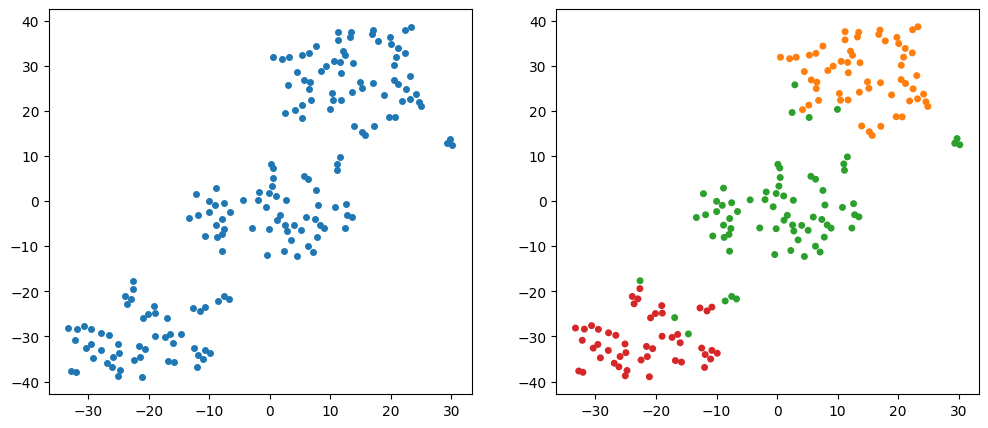

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# standardize the data first
scaler = StandardScaler()
_X = scaler.fit_transform(X)

model = TSNE(n_components=2,
             perplexity=10,
             learning_rate=100,
             random_state=42)
_X = model.fit_transform(_X)

# visualize the cluster and color it with ground truth
scatter_2sides(_X, y)

### Compare to PCA?

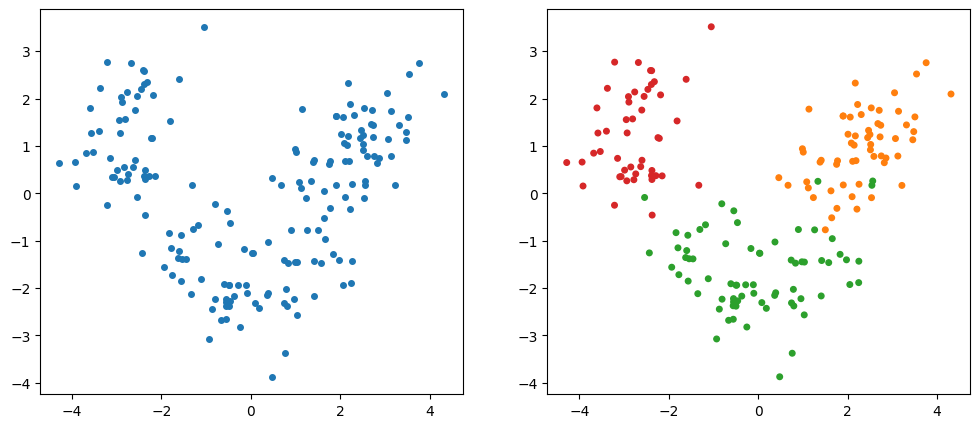

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_X = scaler.fit_transform(X)
model = PCA(n_components=2)
_X = model.fit_transform(_X)

# visualize the cluster and color it with ground truth
scatter_2sides(_X, y)

In [ ]:
# Another example for compring PCA and t-SNE
# Source https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/
# Generate a synthetic data

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

A = np.random.normal(scale=1, size=(100,3))
B = np.array([x for x in np.random.normal(scale=5, size=(500,3)) if np.linalg.norm(x) > 7])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(A[:,0], A[:,1], A[:, 2])
ax.scatter(B[:,0], B[:,1], B[:, 2])

<Figure size 640x480 with 0 Axes>

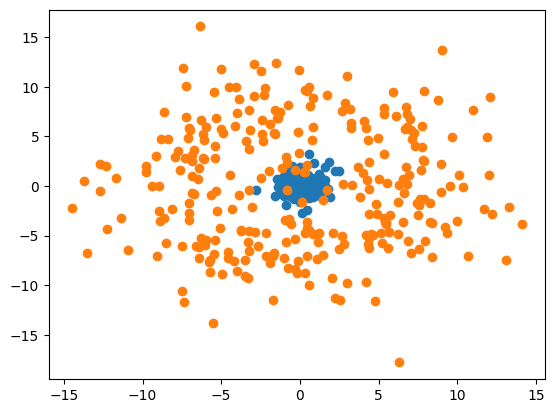

In [ ]:
from sklearn.decomposition import PCA
X = np.r_[A,B]
X2 = PCA(n_components=2).fit_transform(X)
A2 = X2[:A.shape[0],:]
B2 = X2[A.shape[0]:,:]
plt.scatter(A2[:,0], A2[:,1])
plt.scatter(B2[:,0], B2[:,1])

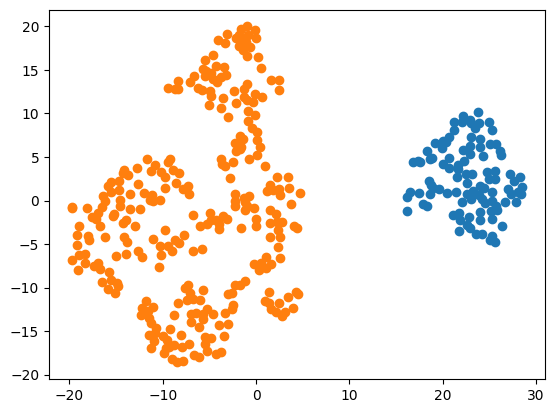

In [ ]:
from sklearn.manifold import TSNE
X3 = TSNE(n_components=2).fit_transform(X)
A3 = X3[:A.shape[0],:]
B3 = X3[A.shape[0]:,:]
plt.scatter(A3[:,0], A3[:,1])
plt.scatter(B3[:,0], B3[:,1])

In [ ]:
# Try to run the above TSNE code for another time
def plot_tsne():
  X3 = TSNE(n_components=2).fit_transform(X)
  A3 = X3[:A.shape[0],:]
  B3 = X3[A.shape[0]:,:]
  plt.scatter(A3[:,0], A3[:,1])
  plt.scatter(B3[:,0], B3[:,1])

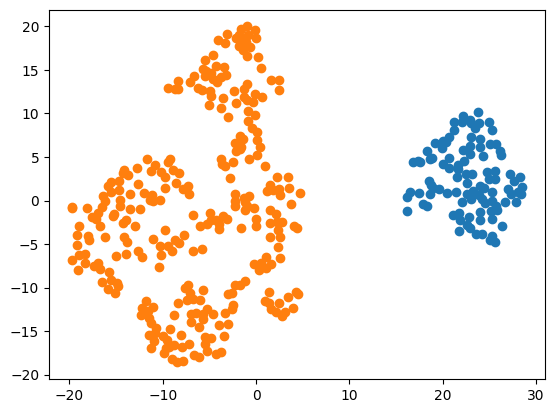

In [ ]:
plot_tsne()

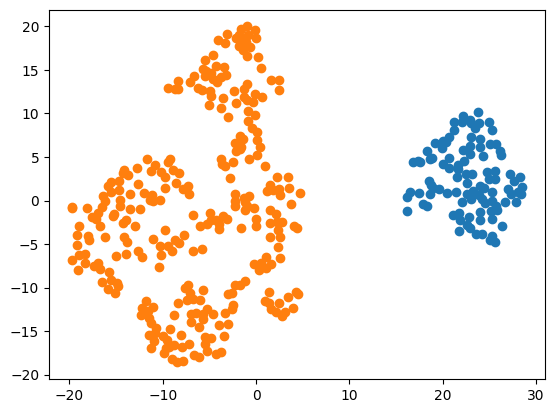

In [ ]:
plot_tsne()

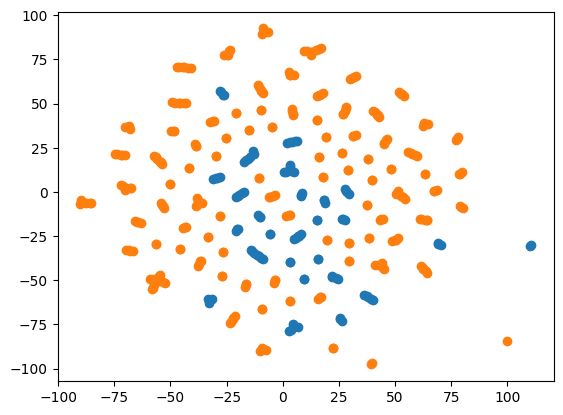

In [ ]:
# Try different perplexity
from sklearn.manifold import TSNE
X3 = TSNE(n_components=2, perplexity=1).fit_transform(X)
A3 = X3[:A.shape[0],:]
B3 = X3[A.shape[0]:,:]
plt.scatter(A3[:,0], A3[:,1])
plt.scatter(B3[:,0], B3[:,1])

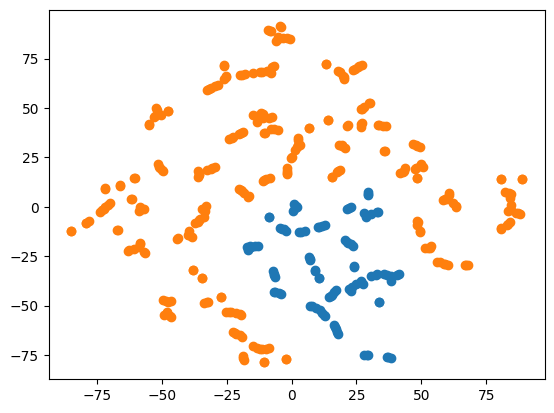

In [ ]:
from sklearn.manifold import TSNE
X3 = TSNE(n_components=2, perplexity=2).fit_transform(X)
A3 = X3[:A.shape[0],:]
B3 = X3[A.shape[0]:,:]
plt.scatter(A3[:,0], A3[:,1])
plt.scatter(B3[:,0], B3[:,1])

## t-SNE on MNIST dataset

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [ ]:
#Down load data mnist as_frame=False (Let input isn't Pandas but is numpy)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)


In [ ]:
print('X:', X.shape) # เก็บ pixel ที่ไว้สร้ารูปภาพ
print('y:', y.shape) # เลขที่แท้จริงของรูป

X: (70000, 784)
y: (70000,)


### Samples from MNIST

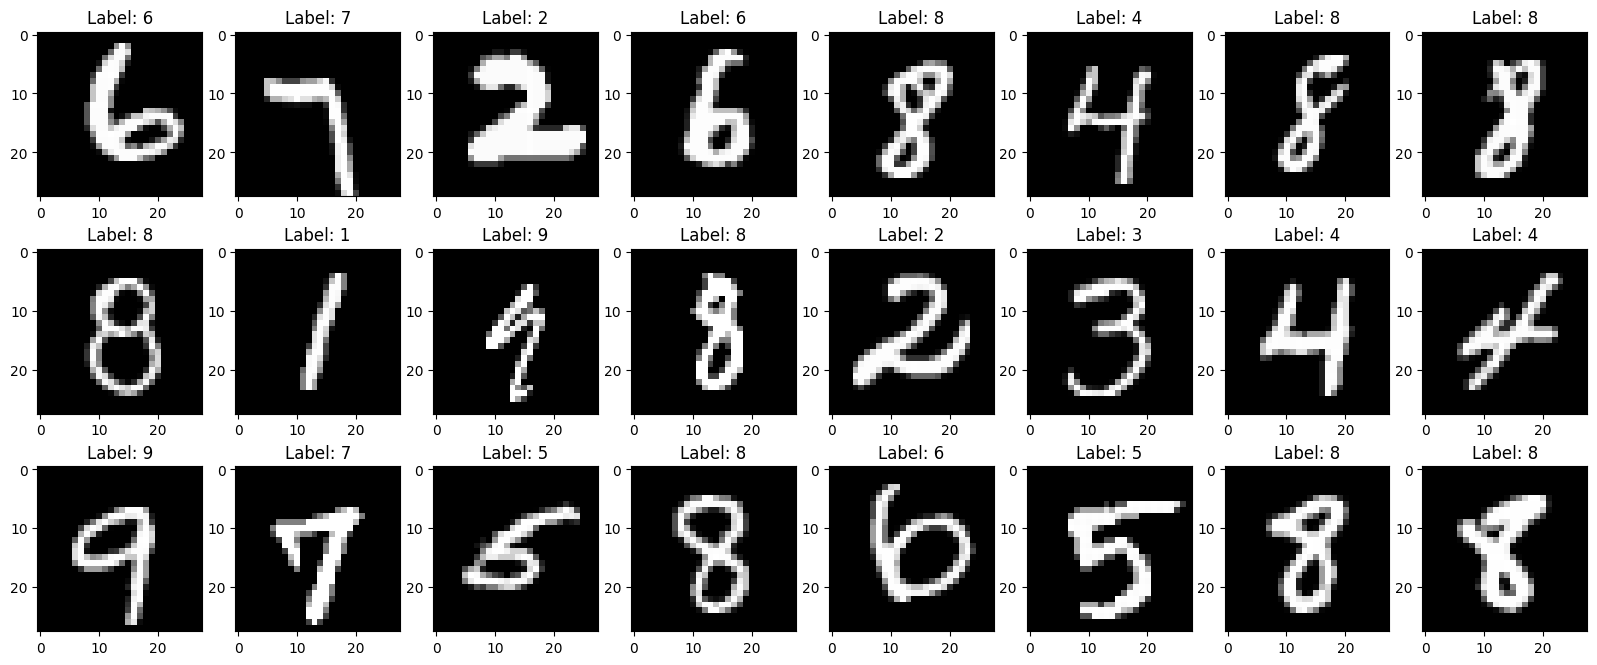

In [ ]:
# สุ่มค่าใน 24 ค่า จากช่วง 0 ถึง len(x) คือ 69999 ก็คือจะเก็บค่า indexไว้
# idx = list(เก็บค่าที่สุ่มไว้)
idx = np.random.choice(len(X), 24)
# สร้างกราฟย่อย 3 row , 8 columns
fig, ax = plt.subplots(3, 8, figsize=(20, 8))
#จะเป็นลิสต์ที่ประกอบด้วยแผนภาพย่อยทั้งหมด (24 แผนภาพ) โดยที่แต่ละแผนภาพจะถูกเรียงตามลำดับจากแถวแรกไปยังแถวสุดท้าย
ax = [*ax[0], *ax[1], *ax[2]]
for i in range(len(idx)):
  # X[idx[i]] เลือกค่าX ที่มีindex ตรงกับค่าที่random มาตัวที่ i =range(0,len(idx))
  img = X[idx[i]].reshape(28, 28)
  ax[i].set_title(f'Label: {y[idx[i]]}')
  ax[i].imshow(img, cmap='gray')

In [ ]:
idx

array([40889, 14777, 55507, 36826, 17672, 33637,  3211, 63833, 28352,
       45588, 18382, 26122, 65883, 57941, 62249, 41125, 56102, 38794,
       41185, 42736, 28810, 56630, 52050, 27076])

## Selecting a small subset from the MNIST (t-SNE is too slow)

In [ ]:
n = 3000
# ทำให้ในการrandom ครั้งต่อไป ข้อมูลที่สุ่มมายังเหมือนเดิม
np.random.seed(42)
# idx คือสุ่มค่าจาก 0 ถึง len(X) มาทั้งหมด n ตัว  , idx = list(541,755,7453,....) คือยกตัวอย่างเลขที่สุ่มได้
idx = np.random.choice(len(X), n)
# ข้อมูลpixel ของแต่ละ idx X = เก็บค่าpixel size 28*28 เพื่อนำมาสร้างรูปภาพ
Xs = X[idx]
# y = ตัวแปรที่เก็บค่าจริงๆของตัวเลข
ys = np.array([int(i) for i in y[idx]])
print('X:', Xs.shape)
print('Y:', ys.shape)
print(ys[:3])

X: (3000, 784)
Y: (3000,)
[0 0 1]


## Naively using PCA

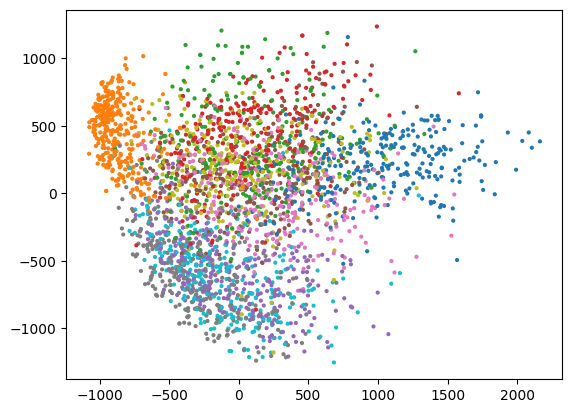

In [ ]:
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA(n_components=2)
# Apply the fit_transform method of model to grains: pca_features
_X = model.fit_transform(Xs)

scatter(_X,ys)

# 1. You may need to adjust relevant hyperparameters of the t-SNE to get beautiful results. (it should clearly clump digits of the same kind together)

In [ ]:
# Random data points
A = np.random.normal(scale=1, size=(100,3))
B = np.array([x for x in np.random.normal(scale=5, size=(500,3)) if np.linalg.norm(x) > 7])

'\nX3 = TSNE(n_components=2, perplexity=10).fit_transform(_X)\nA3 = X3[:A.shape[0],:]\nB3 = X3[A.shape[0]:,:]\nplt.scatter(A3[:,0], A3[:,1])\nplt.scatter(B3[:,0], B3[:,1])\n'

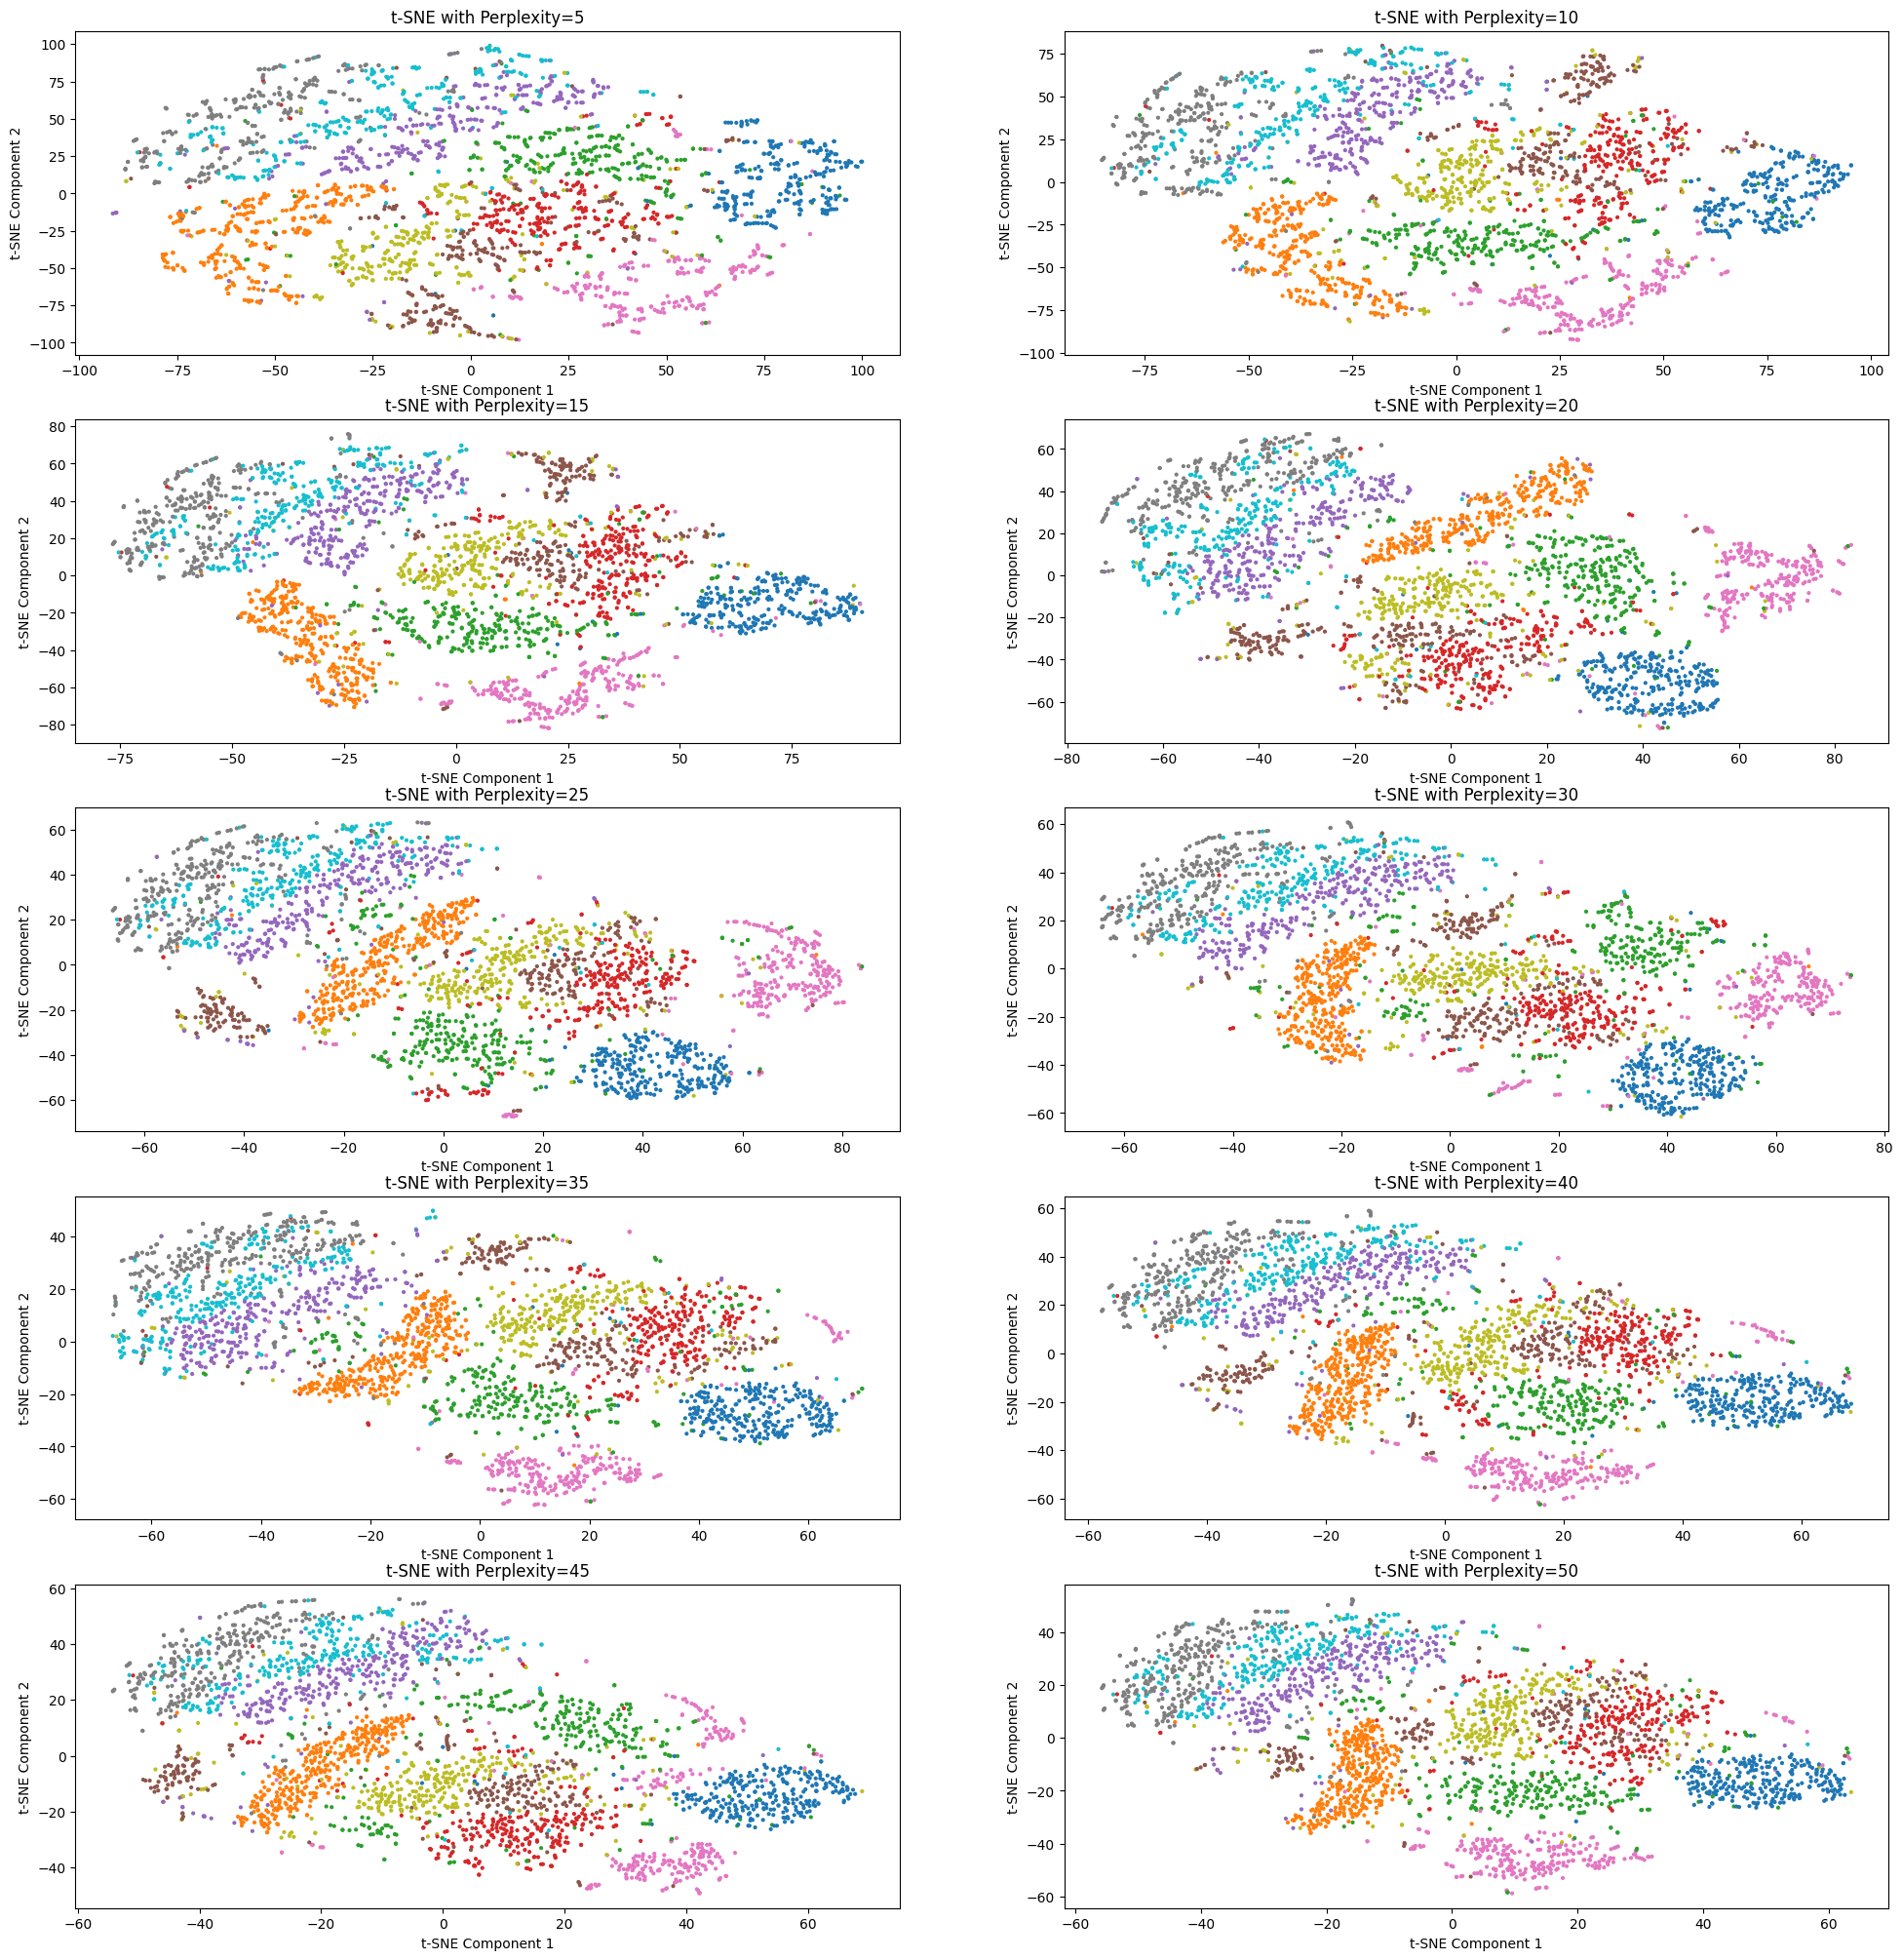

In [ ]:
# Scatter when use perplexity in range(5,50)
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# standardize the data first
# standardize the data first
scaler = StandardScaler()
_X = scaler.fit_transform(Xs)
# Set the size of each subplot to be (12, 5) inches
n_rows, n_cols = 5, 2  # Define grid dimensions
plt.figure(figsize=(n_cols * 12, n_rows * 5))

for idx,per in enumerate(range(5,51,5)) :
  _X = scaler.fit_transform(Xs)
  model = TSNE(n_components=2,
                  perplexity=per,
                  learning_rate=100,
                  early_exaggeration=20,
                  random_state=42)

  _X = model.fit_transform(_X)

    # visualize the cluster and color it with ground truth
  plt.subplot(n_rows, n_cols, idx+1)
  scatter(_X,ys)
  plt.title(f't-SNE with Perplexity={per}')
  plt.xlabel("t-SNE Component 1")
  plt.ylabel("t-SNE Component 2")
'''
X3 = TSNE(n_components=2, perplexity=10).fit_transform(_X)
A3 = X3[:A.shape[0],:]
B3 = X3[A.shape[0]:,:]
plt.scatter(A3[:,0], A3[:,1])
plt.scatter(B3[:,0], B3[:,1])
'''
# Scatter when use perplexity in range(5,50)

'\nX3 = TSNE(n_components=2, perplexity=10).fit_transform(_X)\nA3 = X3[:A.shape[0],:]\nB3 = X3[A.shape[0]:,:]\nplt.scatter(A3[:,0], A3[:,1])\nplt.scatter(B3[:,0], B3[:,1])\n'

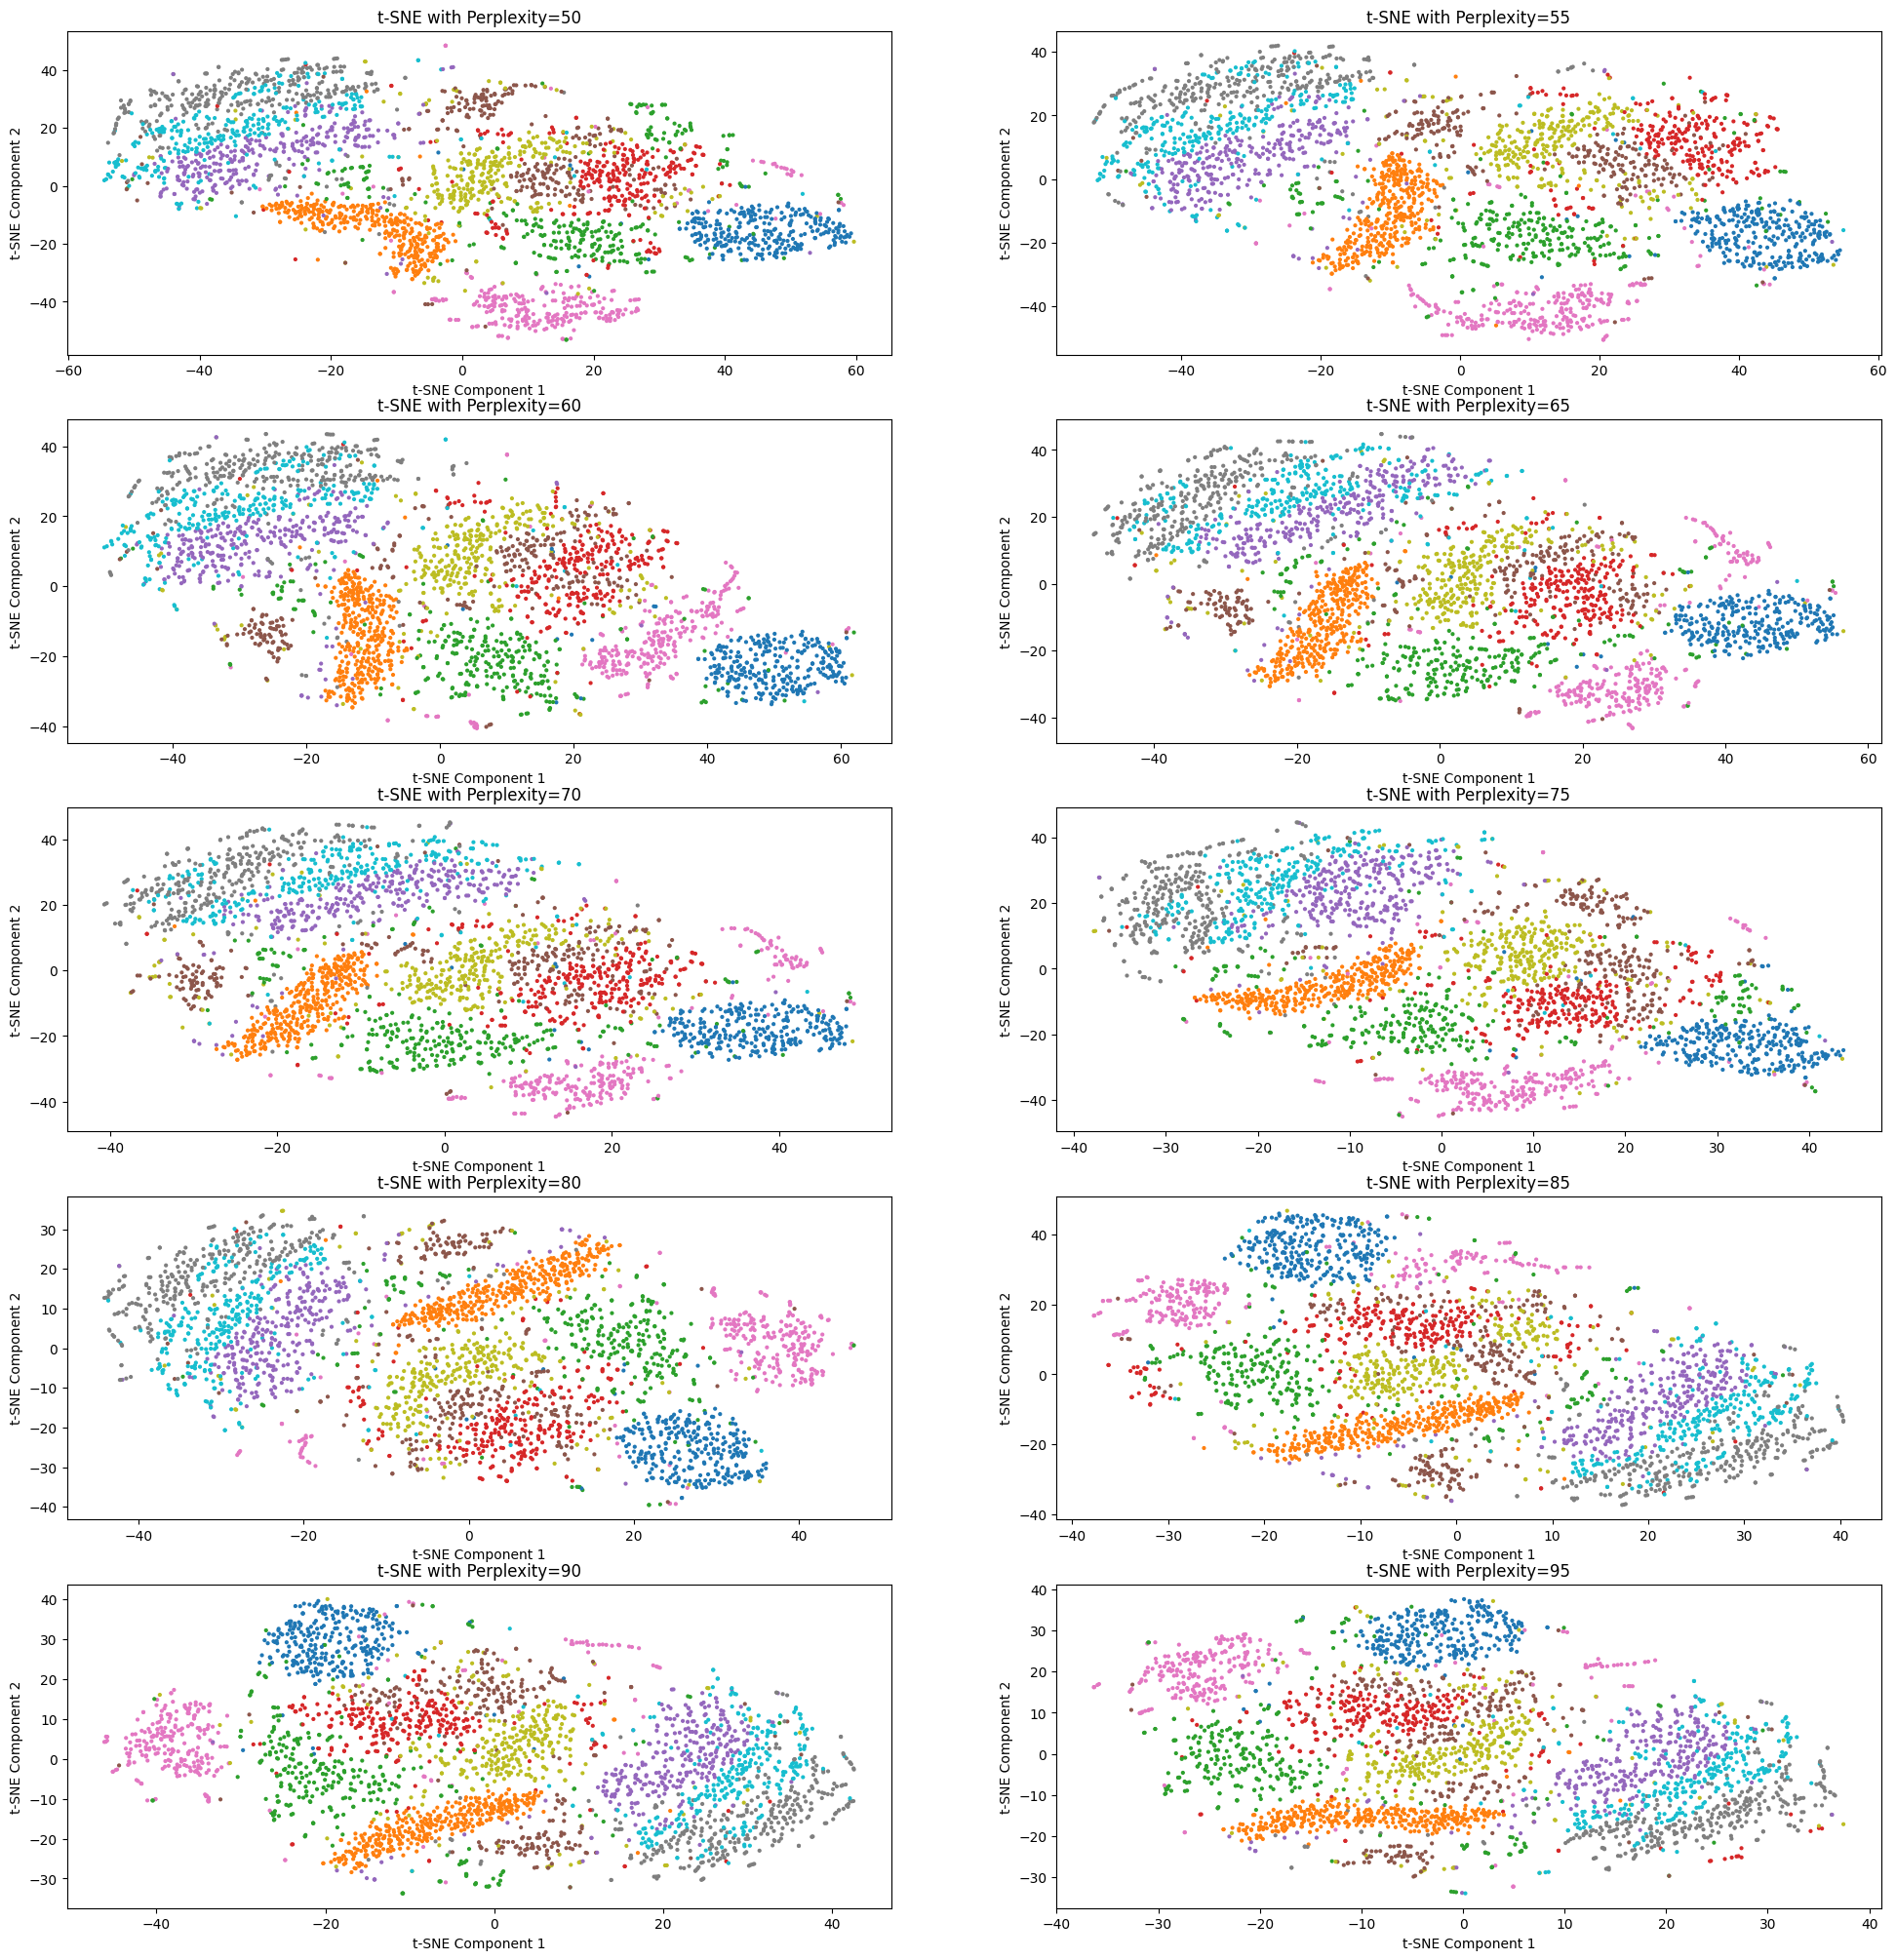

In [ ]:
# Scatter when use perplexity in range(55,90)
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# standardize the data first
# standardize the data first
scaler = StandardScaler()
_X = scaler.fit_transform(Xs)
X_scaler = _X
# Set the size of each subplot to be (12, 5) inches
n_rows, n_cols = 5, 2  # Define grid dimensions
plt.figure(figsize=(n_cols * 12, n_rows * 5))

for idx,per in enumerate(range(50,100,5)) :
  _X = scaler.fit_transform(Xs)
  model = TSNE(n_components=2,
                  perplexity=per,
                  learning_rate="auto",
                  early_exaggeration=20,
                  random_state=42)

  _X = model.fit_transform(_X)

    # visualize the cluster and color it with ground truth
  plt.subplot(n_rows, n_cols, idx+1)
  scatter(_X,ys)
  plt.title(f't-SNE with Perplexity={per}')
  plt.xlabel("t-SNE Component 1")
  plt.ylabel("t-SNE Component 2")
'''
X3 = TSNE(n_components=2, perplexity=10).fit_transform(_X)
A3 = X3[:A.shape[0],:]
B3 = X3[A.shape[0]:,:]
plt.scatter(A3[:,0], A3[:,1])
plt.scatter(B3[:,0], B3[:,1])
'''
# Scatter when use perplexity in range(55,90)